In [5]:
# Cell A: Imports & Load Dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Load dataset
df = pd.read_csv("retail_customers_clean.csv")

# Preview
print("Shape:", df.shape)
display(df.head())


Shape: (100, 7)


,CustomerID,Age,Gender,Annual_Income,Spending_Score,Purchases_Per_Year,Loyalty_Years
0,1,56,Female,108,2,25,6
1,2,46,Female,81,1,42,2
2,3,32,Male,116,48,31,9
3,4,60,Male,20,12,3,2
4,5,25,Male,46,69,40,4



--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          100 non-null    int64 
 1   Age                 100 non-null    int64 
 2   Gender              100 non-null    object
 3   Annual_Income       100 non-null    int64 
 4   Spending_Score      100 non-null    int64 
 5   Purchases_Per_Year  100 non-null    int64 
 6   Loyalty_Years       100 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 5.6+ KB
None

--- Missing Values ---
CustomerID            0
Age                   0
Gender                0
Annual_Income         0
Spending_Score        0
Purchases_Per_Year    0
Loyalty_Years         0
dtype: int64

--- Summary Statistics ---


,CustomerID,Age,Annual_Income,Spending_Score,Purchases_Per_Year,Loyalty_Years
count,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,40.88000,70.770000,49.560000,26.160000,4.670000
std,29.011492,13.99082,30.828576,29.637309,14.144078,3.213152
min,1.000000,18.00000,20.000000,1.000000,1.000000,0.000000
25%,25.750000,30.50000,43.000000,24.750000,15.750000,2.000000
50%,50.500000,41.00000,74.500000,47.000000,26.000000,4.000000
75%,75.250000,53.25000,96.500000,72.750000,39.000000,8.000000
max,100.000000,64.00000,118.000000,100.000000,49.000000,10.000000


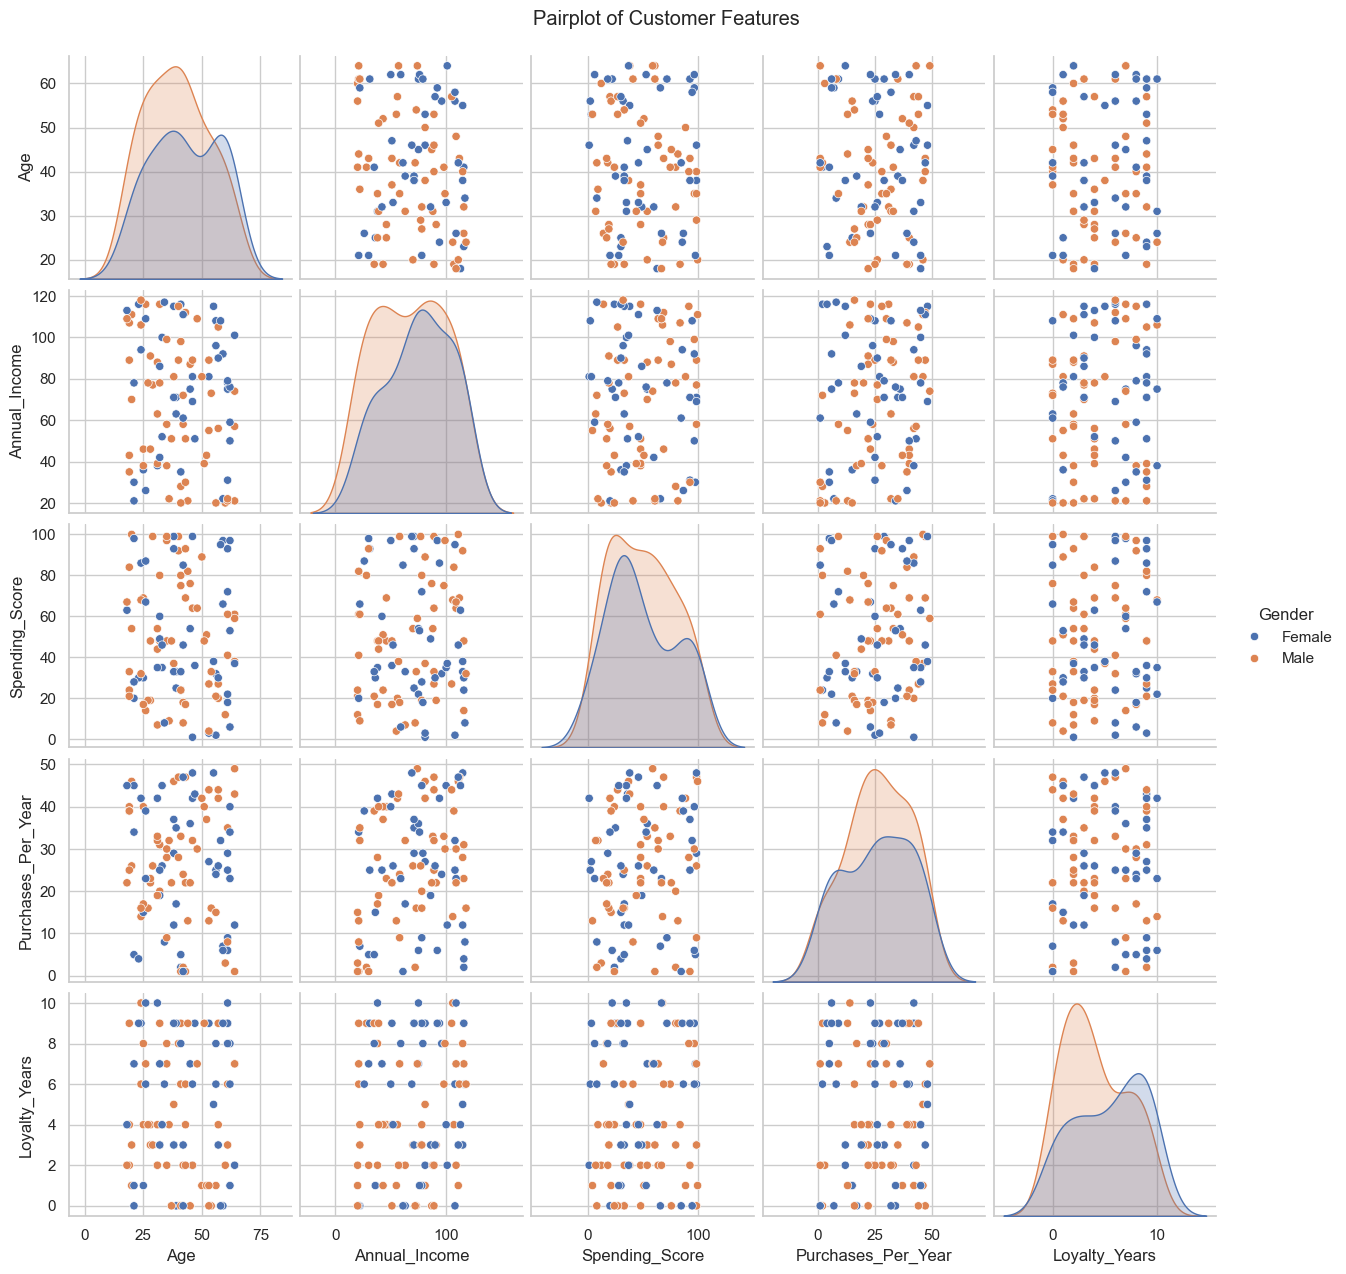

In [6]:
# Cell B: Explore the dataset

print("\n--- Data Info ---")
print(df.info())

print("\n--- Missing Values ---")
print(df.isnull().sum())

print("\n--- Summary Statistics ---")
display(df.describe())

# Quick visualization of numeric relationships
sns.pairplot(df.drop(columns=['CustomerID']), hue="Gender")
plt.suptitle("Pairplot of Customer Features", y=1.02)
plt.show()


In [7]:
# Cell C: Data preprocessing

# Convert Gender to numeric (Female = 0, Male = 1)
df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1})

# Features to use for clustering
features = ['Age', 'Gender', 'Annual_Income', 'Spending_Score', 'Purchases_Per_Year', 'Loyalty_Years']

# Standardize numeric features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[features])

print("Scaled data shape:", scaled_data.shape)


Scaled data shape: (100, 6)


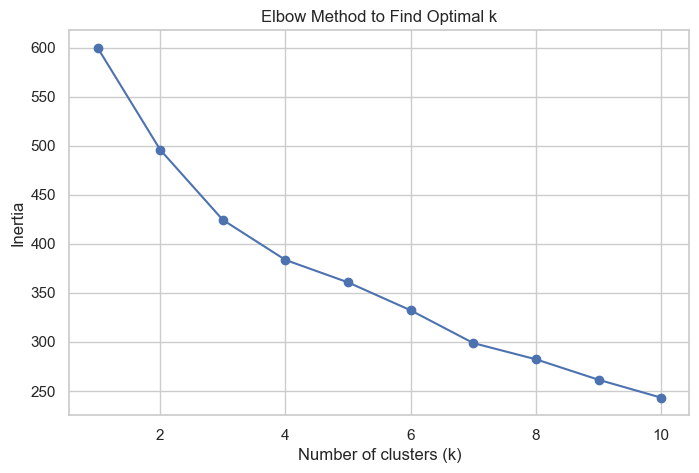

In [8]:
# Cell D: Elbow Method
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method to Find Optimal k')
plt.show()


In [10]:
# Cell E: Apply K-Means

from sklearn.cluster import KMeans

optimal_k = 4  # or use whatever k you found from the elbow method
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

# Cluster summary
print(df['Cluster'].value_counts())
display(df.groupby('Cluster')[features].mean())


Cluster
2    31
0    25
1    22
3    22
Name: count, dtype: int64


,Age,Gender,Annual_Income,Spending_Score,Purchases_Per_Year,Loyalty_Years
Cluster,,,,,,
0,46.400000,0.960000,39.480000,38.040000,18.320000,3.080000
1,39.909091,0.000000,87.954545,40.227273,25.818182,3.000000
2,33.774194,1.000000,89.161290,59.967742,31.645161,4.580645
3,45.590909,0.045455,63.227273,57.318182,27.681818,8.272727


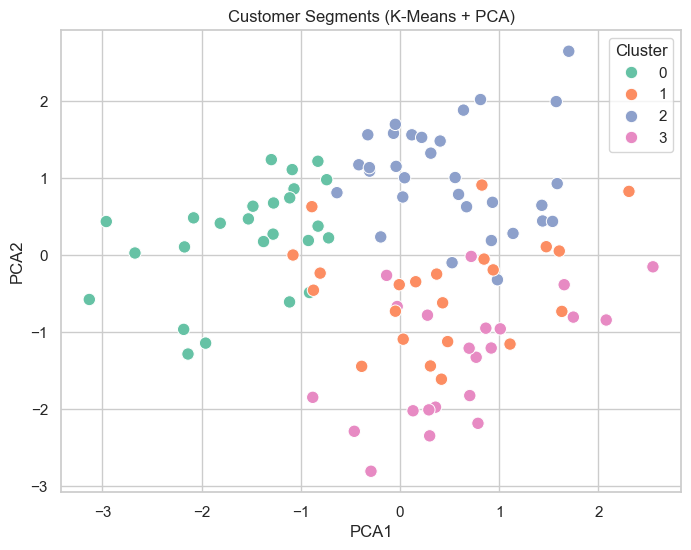

In [12]:
# Cell F: PCA visualization

from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

df['PCA1'] = pca_data[:, 0]
df['PCA2'] = pca_data[:, 1]

plt.figure(figsize=(8,6))
sns.scatterplot(
    x='PCA1', y='PCA2', hue='Cluster',
    palette='Set2', data=df, s=80
)
plt.title('Customer Segments (K-Means + PCA)')
plt.show()


In [13]:
# Cell G: Save results
df.to_csv("retail_customer_segments.csv", index=False)
print("✅ Segmented dataset saved as 'retail_customer_segments.csv'")


✅ Segmented dataset saved as 'retail_customer_segments.csv'
